This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fml-sicom3a/master?urlpath=lab/tree/notebooks/7_trees_randomforest_boosting/)

## RANDOM FORESTS regressors 

### Consider first the  same example as in notebook `N2_Regression_tree.ipynb`
This is a regression problem. Rather than evaluating the optimal tree structure of a single tree, random forest is considered. 
See
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

The number of point in the set is 629


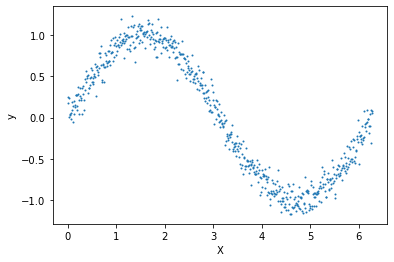

In [1]:
# Create a new realization od the signal
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

noise_std=.1
X=np.arange(0,2*np.pi,.01)[:,np.newaxis]
nx=np.random.randn(X.shape[0],1)*noise_std
y=np.sin(X)+np.random.randn(X.shape[0],1)*noise_std
print("The number of point in the set is {}".format(len(X)))

plt.figure()
plt.scatter(X,y,s=1)
plt.xlabel('X')
plt.ylabel('y');

In **random forest**, each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.

Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size max_features.

(Note that on thour example, we only deal with a single feature.)

The purpose of these two sources of randomness is to decrease the variance of the forest estimator. Indeed, individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model.

*(extracted from https://scikit-learn.org/stable/modules/ensemble.html#forest)*


MSE = 0.0019143711219644015


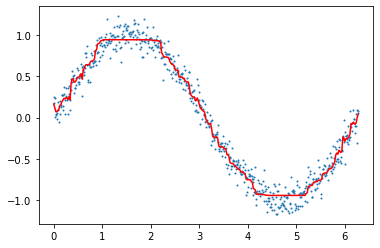

In [2]:
# random forest estimator : 
from sklearn.ensemble import RandomForestRegressor
clf=RandomForestRegressor(n_estimators=100, \
                           max_depth=5,\
                           random_state=None, \
                           criterion='mse')
clf=clf.fit(X,y.ravel())

Ntest=300
XX = np.linspace(X.min(),X.max(),Ntest)
y_ref=np.sin(XX)
XX = XX.reshape(len(XX),1)
yp = clf.predict(XX)

plt.scatter(X,y,s=1)
plt.plot(XX,yp, color='red')


error=np.square(y_ref-yp).sum()/Ntest
print('MSE = {}'.format(error))

## Exercize

- Change the parameter max_depth in the code above. 
- Compare the behaviour of the random forest regressor with the behaviour of the tree regressor of notebook N2_a_Regression_tree, when max_depth is changed.

Explain your findings. 

In **extremely randomized trees**, randomness goes one step further in the way splits are computed. 

As in random forests, a random subset of candidate features is used (*again, here we have a single feature, so this does not apply*) but instead of looking for the most discriminative thresholds, **thresholds are drawn at random** for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. 

This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias.

MSE = 0.004553804568572212


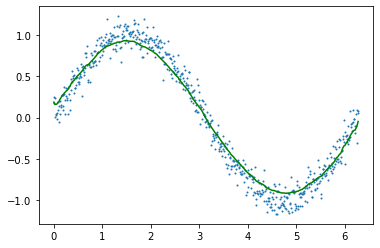

In [3]:
from sklearn.ensemble import ExtraTreesRegressor

clf2=ExtraTreesRegressor(n_estimators=1000, criterion='mse', max_depth=5,\
                         random_state=None)
clf2=clf2.fit(X,y.ravel())

Ntest=300
XX = np.linspace(X.min(),X.max(),Ntest)
y_ref=np.sin(XX)
XX = XX.reshape(len(XX),1)
yp2=clf2.predict(XX)
plt.scatter(X,y,s=1)
plt.plot(XX,yp2, color='green')

# MSE evaluation

error=np.square(y_ref-yp2).sum()/Ntest
print('MSE = {}'.format(error))


## Exercize
- Study the Extremely Randomized Regressor behaviour for max_depth parameter values (change it in the code above) ranging from 1 to 6. 
- Explain the green curve observed for max_depth=1
- Propose a method for setting the optimal value of max_depth parameter. Implement it (hint: look at notebook N2_a_regression_tree)
- Why does the Extremely Randomized Regressor exhibit good performances, although splits are chosen at random? 